<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/instrument_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

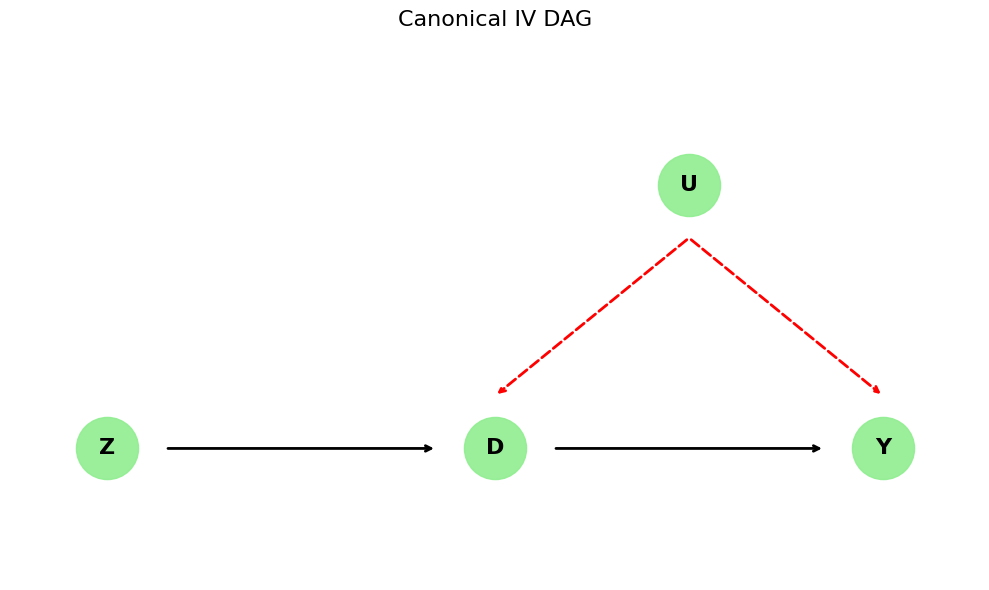

Graph nodes: ['Z', 'D', 'Y', 'U']
Graph edges: [('Z', 'D'), ('D', 'Y'), ('U', 'D'), ('U', 'Y')]


In [ ]:
# # Install required packages
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Z")
G.add_node("D")
G.add_node("Y")
G.add_node("U")  # Add the confounder

# Add edges to represent the causal relationships
G.add_edge("Z", "D")
G.add_edge("D", "Y")
# Add confounder edges with dashed style attribute
G.add_edge("U", "D", style='dashed')
G.add_edge("U", "Y", style='dashed')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create hierarchical positions (same as before)
pos = {
    "Z": (0, 1),
    "D": (2, 1),
    "Y": (4, 1),
    "U": (3, 2)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000,
                      node_color='lightgreen', alpha=0.9)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

# Get current axis
ax = plt.gca()

# Manually draw arrows with shortened lengths
# Z -> D
ax.annotate("", xy=(1.7, 1), xytext=(0.3, 1),  # Shortened from (2,1) and (0,1)
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# D -> Y/π
ax.annotate("", xy=(3.7, 1), xytext=(2.3, 1),  # Shortened from (4,1) and (2,1)
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# U -> D (dashed)
ax.annotate("", xy=(2, 1.2), xytext=(3, 1.8),  # Shortened to not touch nodes
            arrowprops=dict(arrowstyle='->', lw=2, color='red',
                          linestyle='dashed'))

# U -> Y/π (dashed)
ax.annotate("", xy=(4, 1.2), xytext=(3, 1.8),  # Shortened to not touch nodes
            arrowprops=dict(arrowstyle='->', lw=2, color='red',
                          linestyle='dashed'))

# Remove axes and show plot
plt.axis('off')
plt.title('Canonical IV DAG', fontsize=16, pad=20)

# Set axis limits to ensure everything is visible
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.5, 2.5)

plt.tight_layout()
plt.show()

# Print the graph structure
print("Graph nodes:", list(G.nodes()))
print("Graph edges:", list(G.edges()))